In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

In [34]:
ds = ".\\DS\\out\\df_10000.csv" 
df = pd.read_csv(ds)
#df = df.drop(df.columns[0] ,axis=1,inplace=False)

In [35]:
df.head(3)

Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             50306              3                  2                       0   
1                80        5321761                  3                       1   
2             57614            210                  3                       1   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                            0                            0   
1                           12                            0   
2                           77                            6   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      0                      0                0.000000   
1                      6                      0                4.000000   
2                     46                      0               25.666667   

   Fwd Packet Length Std  ...  min_seg_size_forward  Active Mean  Active Std  \
0               0.000000  ...                    32          0.0         0.0   
1               3.464102  ...                    20          0.0         0.0   
2              23.459184  ...                    32          0.0         0.0   

   Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  
0           0           0        0.0       0.0         0         0  BENIGN  
1           0           0        0.0       0.0         0         0  BENIGN  
2           0           0        0.0       0.0         0         0  BENIGN  

[3 rows x 79 columns]

In [36]:
df.shape

(10000, 79)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             10000 non-null  int64  
 1   Flow Duration                10000 non-null  int64  
 2   Total Fwd Packets            10000 non-null  int64  
 3   Total Backward Packets       10000 non-null  int64  
 4   Total Length of Fwd Packets  10000 non-null  int64  
 5   Total Length of Bwd Packets  10000 non-null  int64  
 6   Fwd Packet Length Max        10000 non-null  int64  
 7   Fwd Packet Length Min        10000 non-null  int64  
 8   Fwd Packet Length Mean       10000 non-null  float64
 9   Fwd Packet Length Std        10000 non-null  float64
 10  Bwd Packet Length Max        10000 non-null  int64  
 11  Bwd Packet Length Min        10000 non-null  int64  
 12  Bwd Packet Length Mean       10000 non-null  float64
 13  Bwd Packet Length

In [38]:
df.describe().T

c:\Files\Code\repo\benchmark_ml_dl_tr\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Files\Code\repo\benchmark_ml_dl_tr\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count          mean           std  min     25%  \
Destination Port             10000.0  7.964017e+03  1.817518e+04  0.0   53.00   
Flow Duration                10000.0  1.516718e+07  3.406600e+07 -1.0  155.75   
Total Fwd Packets            10000.0  6.345700e+00  4.987624e+01  1.0    2.00   
Total Backward Packets       10000.0  6.146500e+00  5.596065e+01  0.0    1.00   
Total Length of Fwd Packets  10000.0  4.882271e+02  2.732649e+03  0.0   12.00   
...                              ...           ...           ...  ...     ...   
Active Min                   10000.0  6.505197e+04  7.181769e+05  0.0    0.00   
Idle Mean                    10000.0  8.652088e+06  2.418308e+07  0.0    0.00   
Idle Std                     10000.0  5.957073e+05  5.156148e+06  0.0    0.00   
Idle Max                     10000.0  9.095392e+06  2.507477e+07  0.0    0.00   
Idle Min                     10000.0  8.193570e+06  2.385621e+07  0.0    0.00   

                                 50%         75%          max  
Destination Port                80.0      443.00      65483.0  
Flow Duration                31256.0  3427377.25  119989384.0  
Total Fwd Packets                2.0        5.00       3551.0  
Total Backward Packets           2.0        4.00       4383.0  
Total Length of Fwd Packets     62.0      206.00     164468.0  
...                              ...         ...          ...  
Active Min                       0.0        0.00   47700000.0  
Idle Mean                        0.0        0.00  119000000.0  
Idle Std                         0.0        0.00   66400000.0  
Idle Max                         0.0        0.00  119000000.0  
Idle Min                         0.0        0.00  119000000.0  

[78 rows x 8 columns]

In [39]:
# Discarding NA values.
# Replace infinite updated data with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
df.dropna(inplace=True)
df.shape

(9991, 79)

In [40]:
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

## feature selection phase - find cols with all zero values 

In [41]:
#all_datav2.describe().iloc[1:].apply(np.sum, index=[])
describe_info = df.describe()
all_zeroes_cols = describe_info.loc[:,(describe_info.iloc[1:] == 0).all()]
all_zeroes_cols

Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  RST Flag Count  \
count         9991.0         9991.0         9991.0          9991.0   
mean             0.0            0.0            0.0             0.0   
std              0.0            0.0            0.0             0.0   
min              0.0            0.0            0.0             0.0   
25%              0.0            0.0            0.0             0.0   
50%              0.0            0.0            0.0             0.0   
75%              0.0            0.0            0.0             0.0   
max              0.0            0.0            0.0             0.0   

       CWE Flag Count  ECE Flag Count  Fwd Avg Bytes/Bulk  \
count          9991.0          9991.0              9991.0   
mean              0.0             0.0                 0.0   
std               0.0             0.0                 0.0   
min               0.0             0.0                 0.0   
25%               0.0             0.0                 0.0   
50%               0.0             0.0                 0.0   
75%               0.0             0.0                 0.0   
max               0.0             0.0                 0.0   

       Fwd Avg Packets/Bulk  Fwd Avg Bulk Rate  Bwd Avg Bytes/Bulk  \
count                9991.0             9991.0              9991.0   
mean                    0.0                0.0                 0.0   
std                     0.0                0.0                 0.0   
min                     0.0                0.0                 0.0   
25%                     0.0                0.0                 0.0   
50%                     0.0                0.0                 0.0   
75%                     0.0                0.0                 0.0   
max                     0.0                0.0                 0.0   

       Bwd Avg Packets/Bulk  Bwd Avg Bulk Rate  
count                9991.0             9991.0  
mean                    0.0                0.0  
std                     0.0                0.0  
min                     0.0                0.0  
25%                     0.0                0.0  
50%                     0.0                0.0  
75%                     0.0                0.0  
max                     0.0                0.0

In [42]:
df.drop(columns=all_zeroes_cols, inplace=True)
df.shape

(9991, 67)

In [43]:
## Creates a  new column to distinguish if is either positive for attack or not. 
is_attack = df.loc[:, "Label"].map(lambda lbl: 0 if lbl == "BENIGN" else 1)
is_attack.name = "is_attack"
df.loc[:, is_attack.name] = is_attack
df.shape

(9991, 68)

In [44]:
class_counts = df['is_attack'].value_counts()
xaxis_labels =["Normal","Attack"]
colors = {'Normal':'green','Attack':'red' }  
legend_labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in legend_labels]
ymax = df.shape [0]
count_dict = class_counts.to_dict()
traffic_counts = count_dict.values()
#type(class_counts) # pandas.core.series.Series

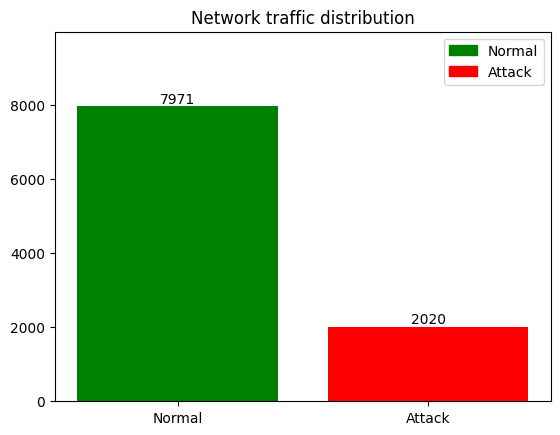

In [45]:
fig, ax = plt.subplots()
bar_container = ax.bar(xaxis_labels, traffic_counts,color =['green','red'])
ax.set(title='Network traffic distribution', ylim=(0, ymax))
ax.bar_label(bar_container, fmt=lambda x: f'{x:.0f}')
ax.legend(handles=handles, labels=legend_labels)

plt.show()

## DOWNSAMPLING

In [46]:
df.loc[:, "is_attack"].value_counts()
rus = RandomUnderSampler(random_state=10, sampling_strategy=0.85) # equals traffic unless ratio is specified
df.drop(["is_attack"], axis=1, inplace=True) # temporarily rm the categorical column for underSampling
all_data_res, trf_type_res = rus.fit_resample(df, is_attack)
#all_datav2 = pd.concat([all_data_res, trf_type_res], join="inner")  # another way to join dataframe w/ series
all_datav2 = all_data_res.join(trf_type_res, how="inner")
all_datav2.shape # check if resulting DaraFrame valid

(4396, 68)

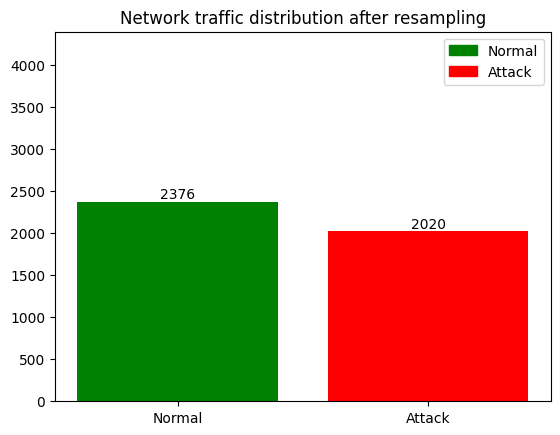

In [47]:
class_counts = all_datav2['is_attack'].value_counts()
xaxis_labels =["Normal","Attack"]
colors = {'Normal':'green','Attack':'red' }  
legend_labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in legend_labels]
ymax = all_datav2.shape [0]
count_dict = class_counts.to_dict()
traffic_counts = count_dict.values()

fig, ax = plt.subplots()
bar_container = ax.bar(xaxis_labels, traffic_counts,color =['green','red'])
ax.set(title='Network traffic distribution after resampling', ylim=(0, ymax))
ax.bar_label(bar_container, fmt=lambda x: f'{x:.0f}')
ax.legend(handles=handles, labels=legend_labels)

plt.show()

In [48]:
all_datav2.dropna()
#all_datav2.info()

Destination Port  Flow Duration  Total Fwd Packets  \
3091               443      117233886                 19   
5671               443      118655797                 74   
7028               443       40691551                  7   
226              57187             81                  1   
2447                53            196                  2   
...                ...            ...                ...   
9981                80       98552775                  8   
9986                80       99595685                  5   
9994                80       98413776                  8   
9995              2100             28                  1   
9996               111             53                  1   

      Total Backward Packets  Total Length of Fwd Packets  \
3091                      21                         1314   
5671                      88                         4801   
7028                       6                            0   
226                        2                            0   
2447                       2                           74   
...                      ...                          ...   
9981                       6                          337   
9986                       6                          310   
9994                       6                          330   
9995                       1                            0   
9996                       1                            2   

      Total Length of Bwd Packets  Fwd Packet Length Max  \
3091                         8073                    444   
5671                       222057                   1081   
7028                           31                      0   
226                             0                      0   
2447                          154                     37   
...                           ...                    ...   
9981                        11595                    337   
9986                        11595                    298   
9994                        11595                    330   
9995                            6                      0   
9996                            6                      2   

      Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
3091                      0               69.157895             113.639910   
5671                      0               64.878378             234.648379   
7028                      0                0.000000               0.000000   
226                       0                0.000000               0.000000   
2447                     37               37.000000               0.000000   
...                     ...                     ...                    ...   
9981                      0               42.125000             119.147493   
9986                      0               62.000000             131.962116   
9994                      0               41.250000             116.672619   
9995                      0                0.000000               0.000000   
9996                      2                2.000000               0.000000   

      ...  Active Mean    Active Std  Active Max  Active Min     Idle Mean  \
3091  ...  310489.5000  3.258907e+05      540929       80050  5.830000e+07   
5671  ...  357174.4545  1.084246e+06     3626252       22952  9.992852e+06   
7028  ...   50688.7500  6.438103e+01       50761       50616  1.000000e+07   
226   ...       0.0000  0.000000e+00           0           0  0.000000e+00   
2447  ...       0.0000  0.000000e+00           0           0  0.000000e+00   
...   ...          ...           ...         ...         ...           ...   
9981  ...    1986.0000  0.000000e+00        1986        1986  9.850000e+07   
9986  ...    9933.0000  0.000000e+00        9933        9933  9.960000e+07   
9994  ...     283.0000  0.000000e+00         283         283  9.840000e+07   
9995  ...       0.0000  0.000000e+00           0           0  0.000000e+00   
9996  ...       0.0000  0.000000e+00

## CALCULATING FEATURES' IMPORTANCE

In [49]:
## feature selection phase - prepare data for RFC
#lbls = all_datav2.loc[:, "Label"]
data_w_o_cat_attrs = all_datav2.iloc[:, :-2]
#lbls
data_w_o_cat_attrs

Destination Port  Flow Duration  Total Fwd Packets  \
3091               443      117233886                 19   
5671               443      118655797                 74   
7028               443       40691551                  7   
226              57187             81                  1   
2447                53            196                  2   
...                ...            ...                ...   
9981                80       98552775                  8   
9986                80       99595685                  5   
9994                80       98413776                  8   
9995              2100             28                  1   
9996               111             53                  1   

      Total Backward Packets  Total Length of Fwd Packets  \
3091                      21                         1314   
5671                      88                         4801   
7028                       6                            0   
226                        2                            0   
2447                       2                           74   
...                      ...                          ...   
9981                       6                          337   
9986                       6                          310   
9994                       6                          330   
9995                       1                            0   
9996                       1                            2   

      Total Length of Bwd Packets  Fwd Packet Length Max  \
3091                         8073                    444   
5671                       222057                   1081   
7028                           31                      0   
226                             0                      0   
2447                          154                     37   
...                           ...                    ...   
9981                        11595                    337   
9986                        11595                    298   
9994                        11595                    330   
9995                            6                      0   
9996                            6                      2   

      Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
3091                      0               69.157895             113.639910   
5671                      0               64.878378             234.648379   
7028                      0                0.000000               0.000000   
226                       0                0.000000               0.000000   
2447                     37               37.000000               0.000000   
...                     ...                     ...                    ...   
9981                      0               42.125000             119.147493   
9986                      0               62.000000             131.962116   
9994                      0               41.250000             116.672619   
9995                      0                0.000000               0.000000   
9996                      2                2.000000               0.000000   

      ...  act_data_pkt_fwd  min_seg_size_forward  Active Mean    Active Std  \
3091  ...                10                    32  310489.5000  3.258907e+05   
5671  ...                19                    20  357174.4545  1.084246e+06   
7028  ...                 0                    32   50688.7500  6.438103e+01   
226   ...                 0                    32       0.0000  0.000000e+00   
2447  ...                 1                    32       0.0000  0.000000e+00   
...   ...               ...                   ...          ...           ...   
9981  ...                 1                    32    1986.0000  0.000000e+00   
9986  ...                 2                    20    9933.0000  0.000000e+00   
9994  ...                 1                    32     283.0000  0.000000e+00   
9995  ...                 0                    40       0.0000  0.000000e+00   
9996  ...     

In [50]:
lbls = all_datav2.loc[:, "is_attack"]

In [51]:
rfc = RandomForestClassifier(random_state=10, n_jobs=1) # 100 trees in forest

# fit random forest classifier on the dataset
rfc.fit(data_w_o_cat_attrs, lbls)

RandomForestClassifier(n_jobs=1, random_state=10)

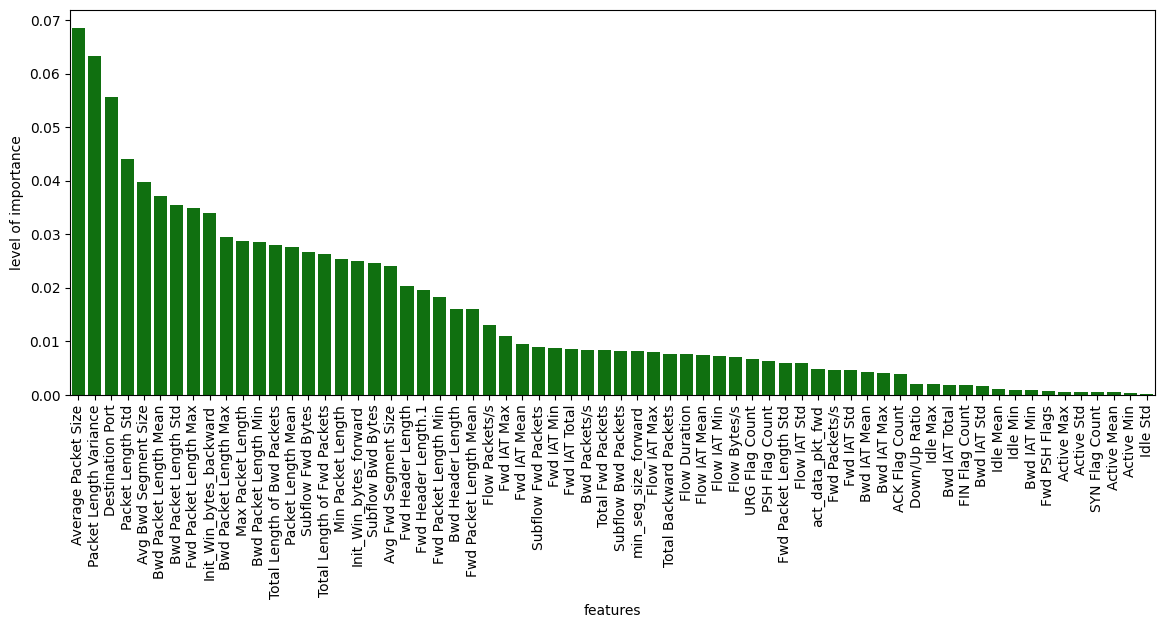

In [52]:
score = np.round(rfc.feature_importances_,5)
importances = pd.DataFrame({'features':data_w_o_cat_attrs.columns,'level of importance':score})
importances = importances.sort_values('level of importance',ascending=False).set_index('features')
# plot importances
sns.barplot(x=importances.index, y="level of importance", data=importances, color="green")
plt.xticks(rotation="vertical")
plt.gcf().set_size_inches(14,5)
#plt.savefig("importances.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.2)
plt.show()

In [53]:
threshold = 0.001 # importance threshold
bl_thresh = importances.loc[importances["level of importance"] < threshold]
print("there are {} features to delete, as they are below chosen threshold".format(bl_thresh.shape[0]))
print("these features are the following:")
feats_to_del = [feat for feat in bl_thresh.index]
print("\n".join(feats_to_del))

there are 9 features to delete, as they are below chosen threshold
these features are the following:
Idle Min
Bwd IAT Min
Fwd PSH Flags
Active Max
Active Std
SYN Flag Count
Active Mean
Active Min
Idle Std


In [54]:
## removing these not important features 
all_datav2.drop(columns=feats_to_del, inplace=True) 

In [55]:
all_datav2.head(3)

Destination Port  Flow Duration  Total Fwd Packets  \
3091               443      117233886                 19   
5671               443      118655797                 74   
7028               443       40691551                  7   

      Total Backward Packets  Total Length of Fwd Packets  \
3091                      21                         1314   
5671                      88                         4801   
7028                       6                            0   

      Total Length of Bwd Packets  Fwd Packet Length Max  \
3091                         8073                    444   
5671                       222057                   1081   
7028                           31                      0   

      Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
3091                      0               69.157895             113.639910   
5671                      0               64.878378             234.648379   
7028                      0                0.000000               0.000000   

      ...  Subflow Bwd Packets  Subflow Bwd Bytes  Init_Win_bytes_forward  \
3091  ...                   21               8073                   29200   
5671  ...                   88             222057                    8192   
7028  ...                    6                 31                     387   

      Init_Win_bytes_backward  act_data_pkt_fwd  min_seg_size_forward  \
3091                      365                10                    32   
5671                     1166                19                    20   
7028                      146                 0                    32   

         Idle Mean  Idle Max   Label  is_attack  
3091  5.830000e+07  58300000  BENIGN          0  
5671  9.992852e+06   9999367  BENIGN          0  
7028  1.000000e+07  10000000  BENIGN          0  

[3 rows x 59 columns]

DETECTING HIGHLY CORRELATED FEATURES

In [56]:
all_datav2 = all_datav2.drop(columns =["Label"]).copy()
#all_datav2
all_datav2.head(3)

Destination Port  Flow Duration  Total Fwd Packets  \
3091               443      117233886                 19   
5671               443      118655797                 74   
7028               443       40691551                  7   

      Total Backward Packets  Total Length of Fwd Packets  \
3091                      21                         1314   
5671                      88                         4801   
7028                       6                            0   

      Total Length of Bwd Packets  Fwd Packet Length Max  \
3091                         8073                    444   
5671                       222057                   1081   
7028                           31                      0   

      Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
3091                      0               69.157895             113.639910   
5671                      0               64.878378             234.648379   
7028                      0                0.000000               0.000000   

      ...  Subflow Fwd Bytes  Subflow Bwd Packets  Subflow Bwd Bytes  \
3091  ...               1314                   21               8073   
5671  ...               4801                   88             222057   
7028  ...                  0                    6                 31   

      Init_Win_bytes_forward  Init_Win_bytes_backward  act_data_pkt_fwd  \
3091                   29200                      365                10   
5671                    8192                     1166                19   
7028                     387                      146                 0   

      min_seg_size_forward     Idle Mean  Idle Max  is_attack  
3091                    32  5.830000e+07  58300000          0  
5671                    20  9.992852e+06   9999367          0  
7028                    32  1.000000e+07  10000000          0  

[3 rows x 58 columns]

In [57]:
all_data_corr_mtrx = all_datav2.corr()

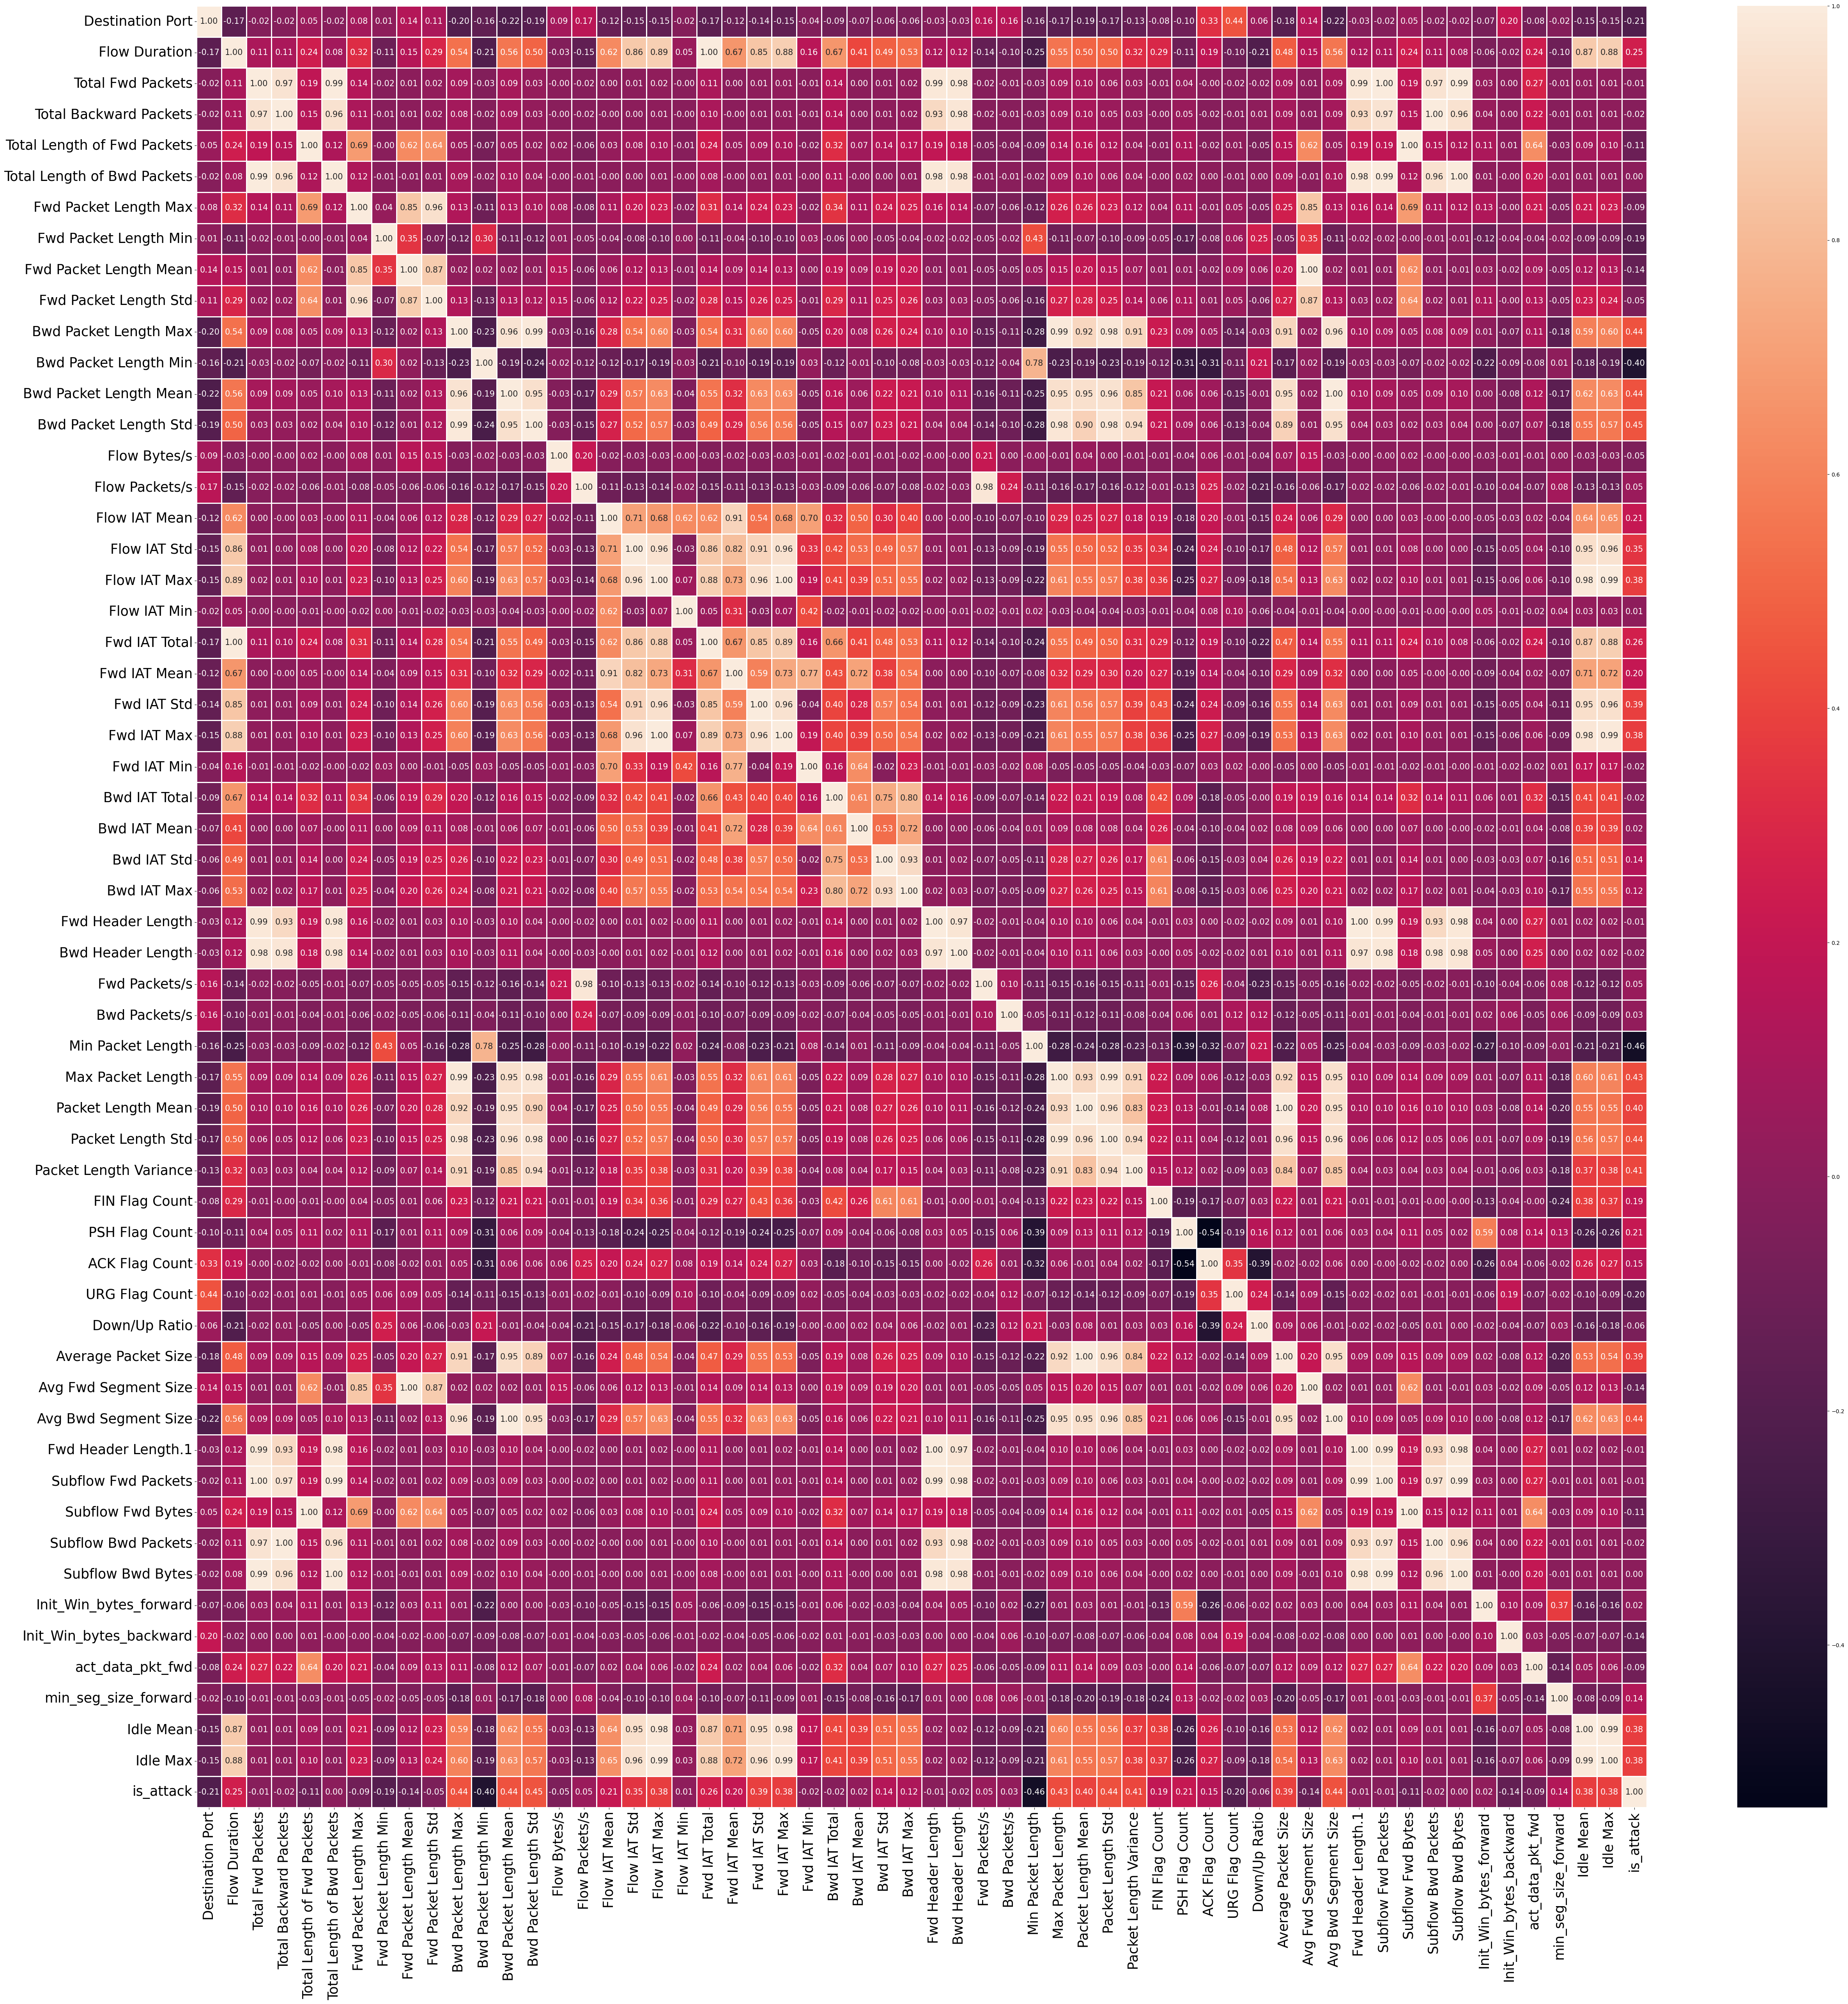

In [58]:
## plotting a correlation heatmap 

plt.gcf().set_size_inches(60, 60)
hm = sns.heatmap(all_data_corr_mtrx, annot=True, linewidths=.8, annot_kws={"fontsize": 15}, fmt=".2f")
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 25)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 25)
#plt.savefig("corr_heatmap.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.4)
plt.show()

In [59]:
## process correlation matrix, list highly correlated feature pairs 
def srt_corr(mtrx):
    corr_ustack = mtrx.unstack().abs()
    #corr_ustack
    corr_srted = corr_ustack.sort_values(ascending=False)
    return corr_srted

srt_corr(all_data_corr_mtrx)

Min Packet Length    Min Packet Length      1.000000
Max Packet Length    Max Packet Length      1.000000
Flow IAT Min         Flow IAT Min           1.000000
Fwd IAT Total        Fwd IAT Total          1.000000
Flow IAT Max         Flow IAT Max           1.000000
                                              ...   
Fwd IAT Mean         Total Fwd Packets      0.000167
                     Subflow Fwd Packets    0.000167
Subflow Fwd Packets  Fwd IAT Mean           0.000167
Bwd Header Length    FIN Flag Count         0.000014
FIN Flag Count       Bwd Header Length      0.000014
Length: 3364, dtype: float64

In [60]:
thres_corr = 0.95
epoch=0
highly_corr = {"dummy": "dummy"}
feats_deled = []

all_data_corr_mtrx2 = all_data_corr_mtrx.copy()  # for easy
def add_to_dct(l, ft, ft2):
    try:
        l[ft].append(ft2)
    except KeyError:
        l[ft] = [ft2]

get_imp = lambda feat: importances.loc[feat][0]
srt_key = lambda elem: get_imp(elem[0])  # gets imp of first elem

def what_to_del(dct_srt):    
    to_del = []  #least imp feature
    for k, val in dct_srt.items():
        ## get all indexes lower than current k
        feats_lw_imp = importances[importances.index.slice_indexer(k)].index
        if set(val) - set(feats_lw_imp):  # feat k creates a corr pair w/ feature of higher importance --- delete feat k
            if k not in to_del: to_del.append(k)
        else:  # feat k creates a corr pair w/ features of lower importnace --- delete one w/ lowest imp 
            for ft in feats_lw_imp[::-1]:  # searching from least important
                if ft in val and ft not in to_del:
                    to_del.append(ft)
                    break  ## deleting first founud feat of lowest possible importance
    return to_del
        
            
while highly_corr:
    count = 0
    highly_corr.clear()
    for feats, val in srt_corr(all_data_corr_mtrx2).items():
        if val > thres_corr and feats[0] != feats[1]:
            count += 1
            add_to_dct(highly_corr, feats[0], feats[1])
    if not highly_corr: break  # no more highly corr pairs
    highly_corr_srt = OrderedDict(sorted(highly_corr.items(), key=srt_key))  # sorted based on imp

    to_del = what_to_del(highly_corr_srt)
    feats_deled += to_del
    epoch +=1 # first epoch will be 1 not 0! 
    print("there are {} higly correlated pairs in {} iteration".format(count, epoch))
    all_data_corr_mtrx2.drop(to_del, axis=1, inplace=True)
    all_data_corr_mtrx2.drop(to_del, axis=0, inplace=True)  # need to remove the feat from both cols and index

print("deleting: {} feature".format(len(feats_deled)))
print("finally deleted:\n"+ "\n".join(feats_deled))

there are 140 higly correlated pairs in 1 iteration
deleting: 25 feature
finally deleted:
Idle Mean
Idle Max
Fwd IAT Std
Fwd Packets/s
Flow IAT Std
Fwd Packet Length Std
Flow Duration
Total Backward Packets
Flow IAT Max
Subflow Bwd Packets
Total Fwd Packets
Subflow Fwd Packets
Fwd Packet Length Mean
Bwd Header Length
Fwd Header Length.1
Fwd Header Length
Subflow Bwd Bytes
Total Length of Fwd Packets
Packet Length Mean
Max Packet Length
Bwd Packet Length Max
Bwd Packet Length Std
Bwd Packet Length Mean
Avg Bwd Segment Size
Packet Length Std


C:\Users\Eddixon\AppData\Local\Temp\ipykernel_24104\3062147905.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  get_imp = lambda feat: importances.loc[feat][0]


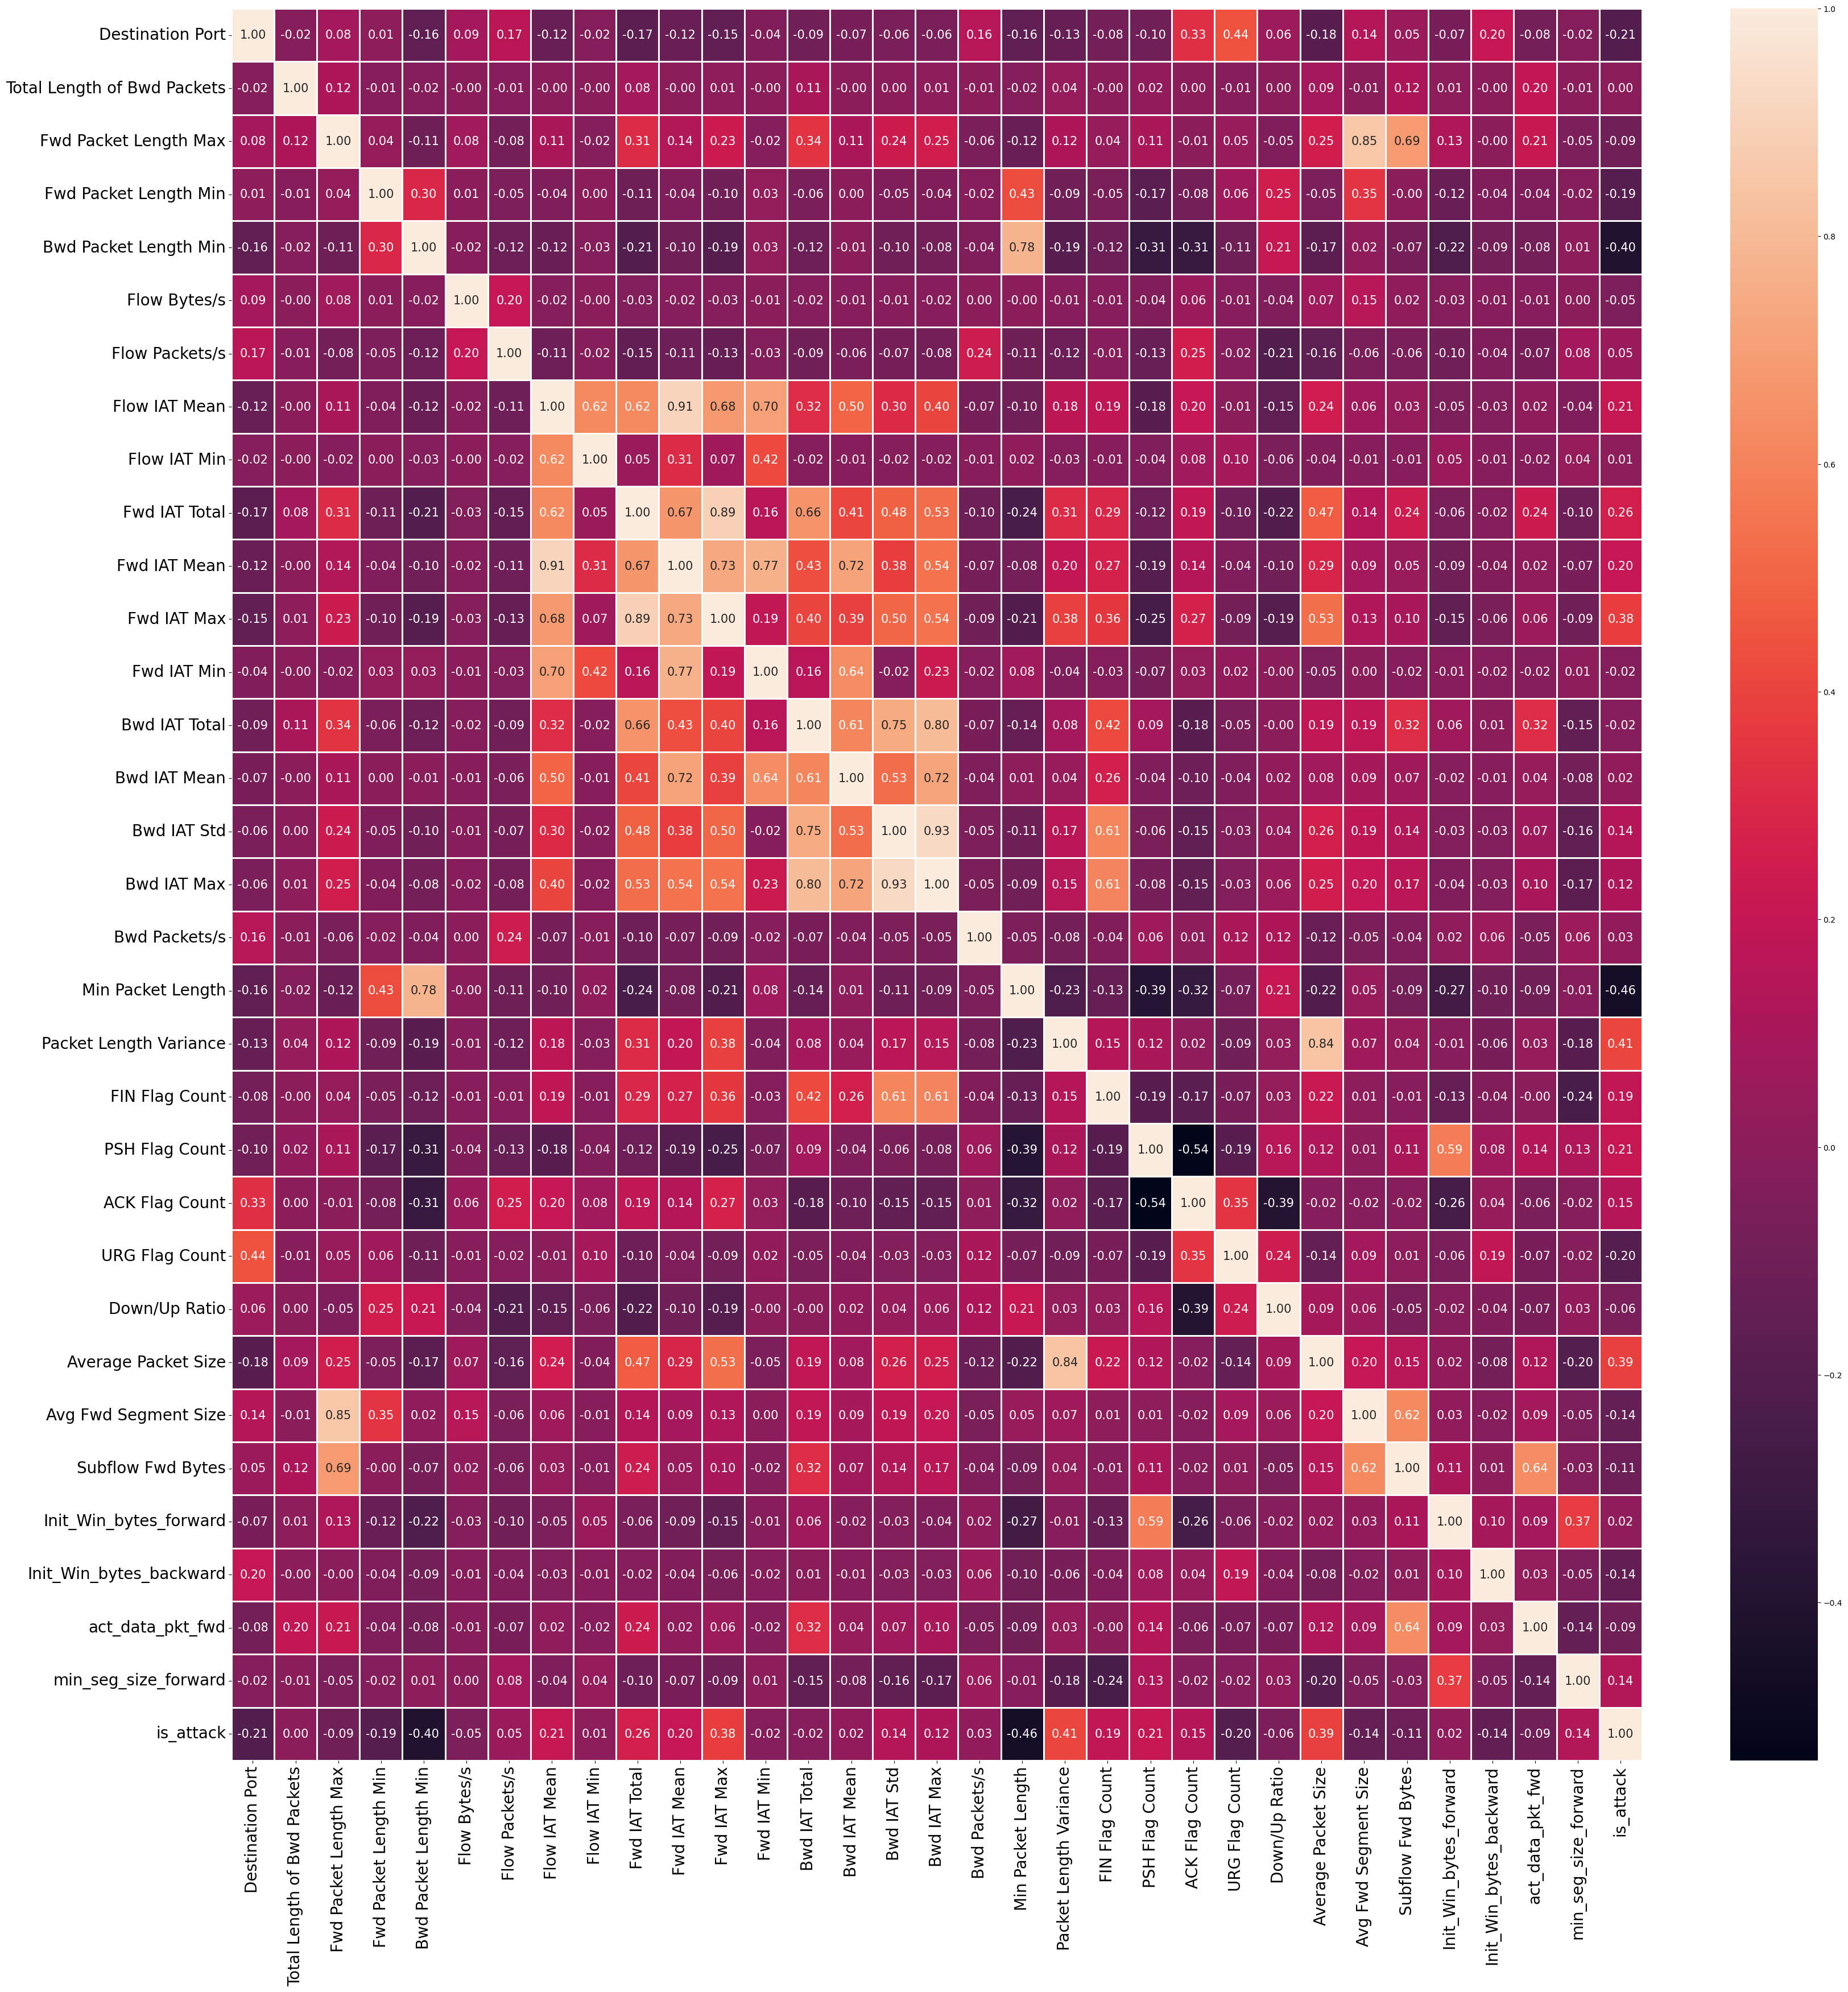

In [61]:
plt.gcf().set_size_inches(40, 40)
hm2 = sns.heatmap(all_data_corr_mtrx2, annot=True, linewidths=.8, annot_kws={"fontsize": 15}, fmt=".2f")
hm2.set_yticklabels(hm2.get_ymajorticklabels(), fontsize = 20)
hm2.set_xticklabels(hm2.get_xmajorticklabels(), fontsize = 20)
#plt.savefig("corr_heatmap2.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.4)
plt.show()

In [62]:
all_datav3 = all_datav2.copy() ## just for ease of cells executing 
all_datav3.drop(feats_deled, axis=1, inplace=True)
all_datav3_cp = all_datav3.copy()
all_datav3 # just check

Destination Port  Total Length of Bwd Packets  Fwd Packet Length Max  \
3091               443                         8073                    444   
5671               443                       222057                   1081   
7028               443                           31                      0   
226              57187                            0                      0   
2447                53                          154                     37   
...                ...                          ...                    ...   
9981                80                        11595                    337   
9986                80                        11595                    298   
9994                80                        11595                    330   
9995              2100                            6                      0   
9996               111                            6                      2   

      Fwd Packet Length Min  Bwd Packet Length Min  Flow Bytes/s  \
3091                      0                      0  8.007071e+01   
5671                      0                      0  1.911900e+03   
7028                      0                      0  7.618289e-01   
226                       0                      0  0.000000e+00   
2447                     37                     77  1.163265e+06   
...                     ...                    ...           ...   
9981                      0                      0  1.210722e+02   
9986                      0                      0  1.195333e+02   
9994                      0                      0  1.211721e+02   
9995                      0                      6  2.142857e+05   
9996                      2                      6  1.509434e+05   

      Flow Packets/s  Flow IAT Mean  Flow IAT Min  Fwd IAT Total  ...  \
3091        0.341198   3.005997e+06             1      117000000  ...   
5671        1.365294   7.369925e+05             0      119000000  ...   
7028        0.319477   3.390963e+06            62       40700000  ...   
226     37037.037040   4.050000e+01            33              0  ...   
2447    20408.163270   6.533333e+01            48             48  ...   
...              ...            ...           ...            ...  ...   
9981        0.142056   7.580983e+06             0       98600000  ...   
9986        0.110447   9.959568e+06             1       99600000  ...   
9994        0.142257   7.570290e+06             0       98400000  ...   
9995    71428.571430   2.800000e+01            28              0  ...   
9996    37735.849060   5.300000e+01            53              0  ...   

      URG Flag Count  Down/Up Ratio  Average Packet Size  \
3091               0              1           234.675000   
5671               0              1          1400.358025   
7028               0              0             2.384615   
226                1              2             0.000000   
2447               0              1            66.250000   
...              ...            ...                  ...   
9981               0              0           852.285714   
9986               0              1          1082.818182   
9994               0              0           851.785714   
9995               0              1             3.000000   
9996               0              1             5.000000   

      Avg Fwd Segment Size  Subflow Fwd Bytes  Init_Win_bytes_forward  \
3091             69.157895               1314                   29200   
5671             64.878378               4801                    8192   
7028              0.000000                  0                     387   
226               0.000000                  0                     243   
2447             37.000000                 74                      -1   
...                    ...                ...                     ...   
9981             42.125000                337                     274   
9986             62.000000                310                       0 

In [65]:
all_datav3.describe().T

count          mean           std         min  \
Destination Port             4396.0  5.838430e+03  1.540536e+04         0.0   
Total Length of Bwd Packets  4396.0  8.682486e+03  1.920565e+05         0.0   
Fwd Packet Length Max        4396.0  1.678148e+02  4.926250e+02         0.0   
Fwd Packet Length Min        4396.0  1.357598e+01  5.568858e+01         0.0   
Bwd Packet Length Min        4396.0  2.885419e+01  6.241605e+01         0.0   
Flow Bytes/s                 4396.0  1.469203e+06  2.633021e+07 -12000000.0   
Flow Packets/s               4396.0  7.824028e+04  2.771195e+05  -2000000.0   
Flow IAT Mean                4396.0  1.885516e+06  5.039172e+06        -1.0   
Flow IAT Min                 4396.0  2.011353e+05  3.231209e+06        -1.0   
Fwd IAT Total                4396.0  1.966076e+07  3.790344e+07         0.0   
Fwd IAT Mean                 4396.0  3.601355e+06  9.653293e+06         0.0   
Fwd IAT Max                  4396.0  1.575098e+07  3.313808e+07         0.0   
Fwd IAT Min                  4396.0  7.739080e+05  7.648430e+06         0.0   
Bwd IAT Total                4396.0  9.495423e+06  2.825616e+07         0.0   
Bwd IAT Mean                 4396.0  1.744108e+06  7.974010e+06         0.0   
Bwd IAT Std                  4396.0  2.248619e+06  8.767651e+06         0.0   
Bwd IAT Max                  4396.0  5.877140e+06  2.097539e+07         0.0   
Bwd Packets/s                4396.0  7.793559e+03  3.996337e+04         0.0   
Min Packet Length            4396.0  1.146542e+01  2.098360e+01         0.0   
Packet Length Variance       4396.0  9.996414e+05  2.403025e+06         0.0   
FIN Flag Count               4396.0  6.210191e-02  2.413680e-01         0.0   
PSH Flag Count               4396.0  3.507734e-01  4.772664e-01         0.0   
ACK Flag Count               4396.0  3.503185e-01  4.771239e-01         0.0   
URG Flag Count               4396.0  6.050955e-02  2.384556e-01         0.0   
Down/Up Ratio                4396.0  6.501365e-01  6.273824e-01         0.0   
Average Packet Size          4396.0  2.818500e+02  4.330611e+02         0.0   
Avg Fwd Segment Size         4396.0  4.561708e+01  1.379699e+02         0.0   
Subflow Fwd Bytes            4396.0  3.532559e+02  1.498427e+03         0.0   
Init_Win_bytes_forward       4396.0  7.055376e+03  1.351557e+04        -1.0   
Init_Win_bytes_backward      4396.0  1.473030e+03  7.399766e+03        -1.0   
act_data_pkt_fwd             4396.0  2.318699e+00  7.980016e+00         0.0   
min_seg_size_forward         4396.0  2.641765e+01  6.774663e+00         0.0   
is_attack                    4396.0  4.595086e-01  4.984144e-01         0.0   

                                    25%           50%           75%  \
Destination Port              80.000000     80.000000  4.430000e+02   
Total Length of Bwd Packets    5.500000    116.000000  4.644750e+03   
Fwd Packet Length Max          2.000000     32.000000  2.225000e+02   
Fwd Packet Length Min          0.000000      0.000000  6.000000e+00   
Bwd Packet Length Min          0.000000      0.000000  6.000000e+00   
Flow Bytes/s                 119.621822   3885.269640  1.363636e+05   
Flow Packets/s                 1.051741     97.751380  2.739726e+04   
Flow IAT Mean                 59.000000  12778.986111  1.082570e+06   
Flow IAT Min                   2.000000      4.000000  5.300000e+01   
Fwd IAT Total                  0.000000     79.500000  6.003497e+06   
Fwd IAT Mean                   0.000000     72.000000  1.309892e+06   
Fwd IAT Max                    0.000000     77.500000  5.594576e+06   
Fwd IAT Min                    0.000000      3.000000  4.800000e+01   
Bwd IAT Total                  0.000000      3.000000  1.472125e+05   
Bwd IAT Mean                   0.000000      3.000000  2.931900e+04   
Bwd IAT Std                    0.000000      0.000000  4.657799e+04   
Bwd IAT Max                    0.000000      3.000000  1.301505e+05   
Bwd Packets/s                  0.060848     10.282862  8.368201e+